<a href="https://colab.research.google.com/github/snehavyshnavi/Deep-Learning/blob/main/DL_Program4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_review_length = 256
train_data = pad_sequences(train_data, maxlen= max_review_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen= max_review_length, padding='post', truncating='post')



In [ ]:
import numpy as np
train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size=10000
embedding_dim= 128

model = Sequential([Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_review_length),
                    GlobalAveragePooling1D(),
                    Dense(16,activation='relu'),
                    Dense(1,activation='sigmoid')])

model.summary()
print("-" * 40)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

----------------------------------------


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Model compiled successfully! Ready to Train.")

Model compiled successfully! Ready to Train.


In [ ]:
history=model.fit(train_data,train_labels,epochs=10,batch_size=32,validation_split=0.2,verbose=1)
print("Model training complete!")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6437 - loss: 0.6224 - val_accuracy: 0.8286 - val_loss: 0.3753
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8720 - loss: 0.3091 - val_accuracy: 0.8664 - val_loss: 0.3162
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9062 - loss: 0.2377 - val_accuracy: 0.8514 - val_loss: 0.3451
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9187 - loss: 0.2082 - val_accuracy: 0.8662 - val_loss: 0.3330
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9319 - loss: 0.1811 - val_accuracy: 0.8842 - val_loss: 0.3040
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9430 - loss: 0.1567 - val_accuracy: 0.8388 - val_loss: 0.4353
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9470 - loss: 0.1419 - val_accuracy: 0.8800 - val_loss: 0.3361
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9537 - loss: 0.1289 - 

In [ ]:
print("\nStep-5: Evaluating the Model on New, Unseen Test Data...")
print("---------------------------------------------------------")
loss,accuracy=model.evaluate(test_data,test_labels, verbose=2)
print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")



Step-5: Evaluating the Model on New, Unseen Test Data...
---------------------------------------------------------
782/782 - 2s - 3ms/step - accuracy: 0.8546 - loss: 0.4360

Final Test Loss: 0.4360
Final Test Accuracy: 0.8546



Step 6: Visualizing Training Progress...
------------------------------------------


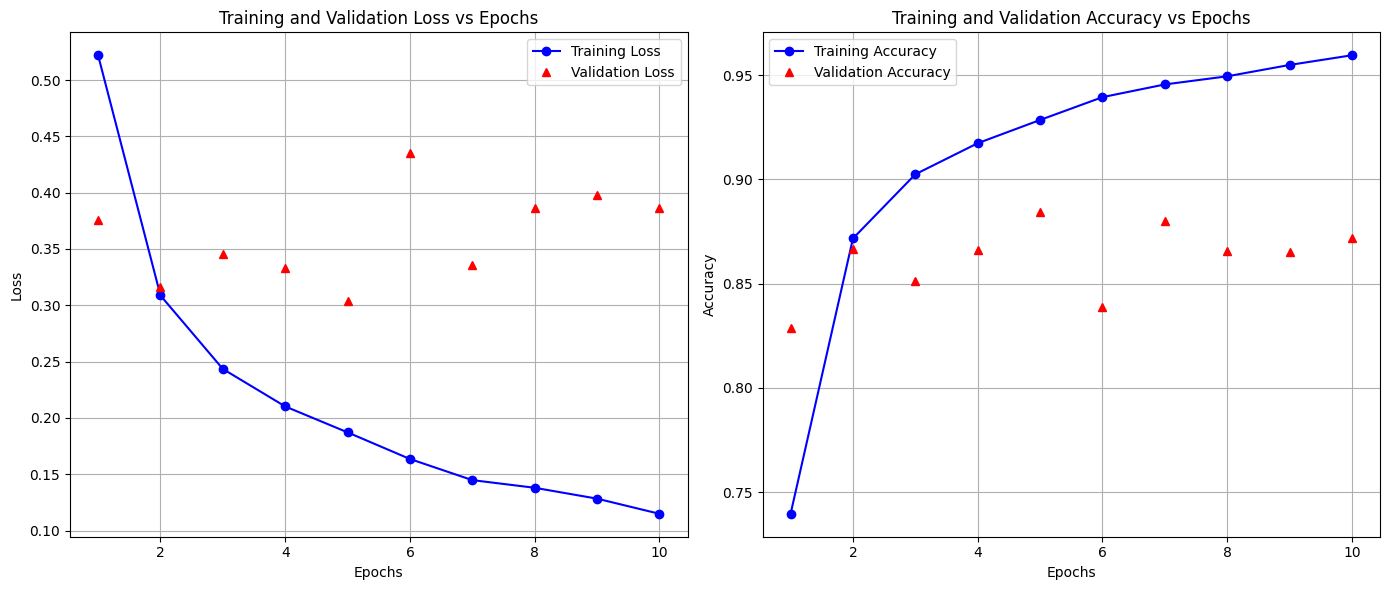


Plots displayed. Observe how the training and validation lines  


In [ ]:
import matplotlib.pyplot as plt
print("\nStep 6: Visualizing Training Progress...")
print("------------------------------------------")

history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)


plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(epochs,loss,'bo-',label='Training Loss')
plt.plot(epochs,val_loss,'r^',label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(epochs,acc,'bo-',label='Training Accuracy')
plt.plot(epochs,val_acc,'r^',label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print("\nPlots displayed. Observe how the training and validation lines  ")
